In [1]:
import math
import numpy as np
import scipy.optimize as opt
import scipy.stats as sts
import pandas as pd 
from LinApp_Deriv import LinApp_Deriv
from LinApp_FindSS import LinApp_FindSS
from LinApp_Solve import LinApp_Solve
from rouwen import rouwen
from numba import jit
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sy
from sympy import diff as diff
from sympy.utilities import lambdify as lambdify

# Problem 2

In [2]:
# Parameters
alpha = 0.33
z = 1
b = 2
t = 0.1
h = 24

In [3]:
def equilibrium(w, *args):
    alpha, z, b, t, h, k = args
    nd = (((1-alpha)*z*(1/w))**(1/alpha))*k
    pi = z*(k**alpha)*((nd)**(1-alpha))-w*(nd)
    ns = h-(b/(w*(1+b)))*(w*h+pi-t)
    return ns-nd

In [4]:
# Find market clear wage rate for k=1 to k=15
k = np.arange(1,16,1)
wage = 0.5*np.ones_like(k)
for i in range(len(k)):
    args = (alpha, z, b, t, h, k[i]) 
    wage[i] = opt.fsolve(equilibrium,wage[i],args=args)

In [5]:
# First order approximation about k=5 and k=10
epsilon = 1e-5
args1 = alpha, z, b, t, h, (5-epsilon)
args2 = alpha, z, b, t, h, (5+epsilon)
w1 = opt.fsolve(equilibrium,0.5,args=args1)
w2 = opt.fsolve(equilibrium,0.5,args=args2)
xu5 = (w2-w1)/(2*epsilon)
wage_1 = wage[k==5]+xu5*(k-5)

args3 = alpha, z, b, t, h, (10-epsilon)
args4 = alpha, z, b, t, h, (10+epsilon)
w3 = opt.fsolve(equilibrium,0.5,args=args3)
w4 = opt.fsolve(equilibrium,0.5,args=args4)
xu10 = (w4-w3)/(2*epsilon)
wage_2 = wage[k==10]+xu10*(k-10)

In [6]:
# Second order approximation about k=5 and k=10
xuu5 = (w2+w1-2*wage[k==5])/(epsilon**2)
wage2_1 = wage[k==5]+xu5*(k-5)+0.5*xuu5*((k-5)**2)
xuu10 = (w4+w3-2*wage[k==10])/(epsilon**2)
wage2_2 = wage[k==10]+xu10*(k-10)+0.5*xuu10*((k-10)**2)

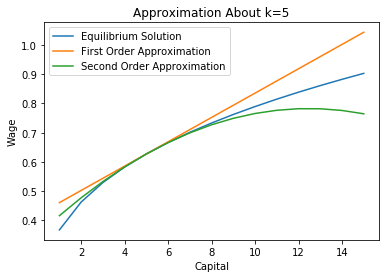

In [7]:
plt.plot(k,wage,label='Equilibrium Solution')
plt.plot(k,wage_1,label='First Order Approximation')
plt.plot(k,wage2_1,label='Second Order Approximation')
plt.legend(loc='best')
plt.xlabel('Capital')
plt.ylabel('Wage')
plt.title('Approximation About k=5')
plt.savefig('approx_k_5')
plt.show()

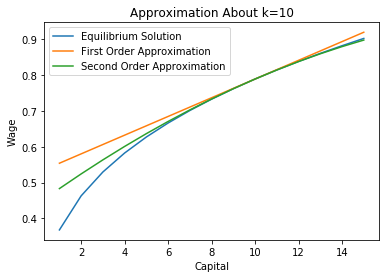

In [8]:
plt.plot(k,wage,label='Equilibrium Solution')
plt.plot(k,wage_2,label='First Order Approximation')
plt.plot(k,wage2_2,label='Second Order Approximation')
plt.legend(loc='best')
plt.xlabel('Capital')
plt.ylabel('Wage')
plt.title('Approximation About k=10')
plt.savefig('approx_k_10')
plt.show()

# Problem 3

In [9]:
# Find y_0
def f(y, *args):
    x_0, = args
    e = ((x_0**0.35)+0.9*x_0-y)**(-2.5)-0.95*((y**0.35+0.9*y)**(-2.5))
    return e
x_0=100
y_0 = opt.fsolve(f,49,args=x_0)

In [10]:
x = np.linspace(99,101,10)
y = 50*np.ones_like(x)

for i in range(len(x)):
    args = x[i] 
    y[i] = opt.fsolve(f,y[i],args=args)
    
epsilon = 0.5
y_1 = opt.fsolve(f,50,args=(x_0-epsilon))
y_2 = opt.fsolve(f,50,args=(x_0+epsilon))
# First Order Approximation
xu = (y_2-y_1)/(2*epsilon)
yvec_1 = y_0+xu*(x-x_0)

# Second Order Approximation
xuu = (y_2+y_1-2*y_0)/(epsilon**2)
yvec_2 = y_0+xu*(x-x_0)+0.5*xuu*((x-x_0)**2)

# Third Order Approximation
y_11 = opt.fsolve(f,50,args=(x_0-2*epsilon))
y_22 = opt.fsolve(f,50,args=(x_0+2*epsilon))
xuuu = (y_22-2*y_2+2*y_1-y_11)/(2*(epsilon**3))
yvec_3 = y_0+xu*(x-x_0)+0.5*xuu*((x-x_0)**2)+(1/6)*xuuu*((x-x_0)**3)

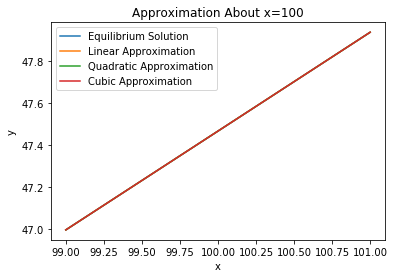

In [11]:
plt.plot(x,y,label='Equilibrium Solution')
plt.plot(x,yvec_1,label='Linear Approximation')
plt.plot(x,yvec_2,label='Quadratic Approximation')
plt.plot(x,yvec_3,label='Cubic Approximation')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Approximation About x=100')
plt.savefig('approx_F')
plt.show()

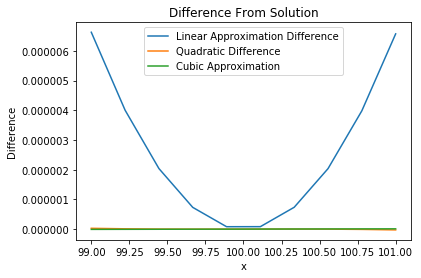

In [12]:
plt.plot(x,yvec_1-y,label='Linear Approximation Difference')
plt.plot(x,yvec_2-y,label='Quadratic Difference')
plt.plot(x,yvec_3-y,label='Cubic Approximation')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('Difference')
plt.title('Difference From Solution')
plt.savefig('approx_diff')
plt.show()

# Problem 4

In [13]:
# Parameters
alpha = 0.35
beta = 0.98
rho = 0.95
sigma = 0.02
num = 26
sizek = num
sizez = num
A = alpha*beta
kbar = A**(1/(1-alpha))

# Create discrete grid for k
kmax = 1.5*kbar
kmin = 0.5*kbar
kgrid = np.linspace(kmin,kmax,sizek)

# Create grid for z 
zmax = 5*sigma
zmin = -5*sigma
mu = (zmax+zmin)/2
step = (zmax-zmin)/(sizez-1)
pi, zgrid = rouwen(rho,mu,step,sizez)

In [14]:
base = 1/(kbar**alpha-kbar)
ka = kbar**alpha
ka1 = kbar**(alpha-1)

Fyy = 2*A*(ka1)*(base**2)
Fyx = A*ka*(ka1*(1-(alpha+1)*ka1)+alpha)*(base**3)
Fyu = A*alpha*(ka1**2)*(base**2)
Fxx = A*ka*(2*ka1**3+(alpha**2+3*alpha-4)*ka1**2-2*(2*alpha-1)*ka1-alpha*(alpha-1))*(base**3)
Fxu = -A*alpha*(ka1**2)*(ka1+alpha-1)*(base**2)
Fuu = (alpha-1)*alpha*A*(kbar**(2*alpha-3))*base

Fy = A*(kbar**(alpha-1))/(kbar**alpha-kbar)
Fx = -Fy*(alpha+kbar**(alpha-1))
Fu = Fy*(alpha*(kbar**(alpha-1)))
xu = (-Fx-np.sqrt(Fx**2-4*Fu*Fy))/(2*Fy)

denom = Fy*(xu**2)+Fy*xu+Fx
xuu = -(Fyy*(xu**4)+2*Fyx*(xu**3)+2*Fyu*(xu**2)+Fxx*(xu**2)+2*Fxu*xu+Fuu)/denom

In [15]:
kmax = 1.5*kbar
kmin = 0.5*kbar
sizek=26
kgrid = np.linspace(kmin,kmax,sizek)
actual = A*(kgrid**alpha)
approx = kbar+xu*(kgrid-kbar)+0.5*xuu*(kgrid-kbar)**2

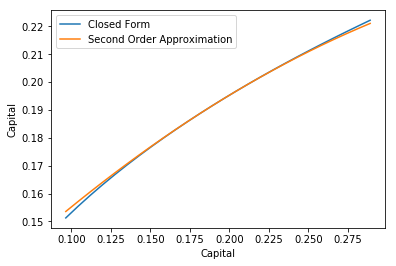

In [16]:
plt.plot(kgrid,actual,label='Closed Form')
plt.plot(kgrid,approx,label='Second Order Approximation')
plt.xlabel('Capital')
plt.ylabel('Capital')
plt.legend()
plt.savefig('BM_secondorder')
plt.show()

# Problem 5

In [17]:
nx = 1
ny = 0
nz = 1
ns = nx+nz+1

N = rho

F = Fy
G = Fx
H = Fu
L = -F*kbar
M = F*(kbar**alpha)
N = rho

P = xu
Q = -(L*N+M)/(F*N+F*P+G)

Hx = P
Hz = Q
Hv = 0

jacobian = np.array([F,G,H,L,M])

kpp, kp, k, zp, z = sy.symbols('kpp kp k zp z')

f = lambda kpp, kp, k, zp, z: (alpha*beta*sy.exp(zp)*(kp**(alpha-1))*(sy.exp(z)*k**alpha-kp)/
                                (sy.exp(zp)*kp**alpha-kpp))

Fyzp = diff(f(kpp, kp, k, zp, z),kpp,zp)
Fyz = diff(f(kpp, kp, k, zp, z),kpp,z)
Fxzp = diff(f(kpp, kp, k, zp, z),kp,zp)
Fxz = diff(f(kpp, kp, k, zp, z),kp,z)
Fuzp = diff(f(kpp, kp, k, zp, z),k,zp)
Fuz = diff(f(kpp, kp, k, zp, z),k,z)
Fzpzp = diff(f(kpp, kp, k, zp, z),zp,zp)
Fzpz = diff(f(kpp, kp, k, zp, z),zp,z)
Fzz = diff(f(kpp, kp, k, zp, z),z,z)

Fyzp = lambdify((kpp, kp, k, zp, z),Fyzp,'numpy')
Fyz = lambdify((kpp, kp, k, zp, z),Fyz,'numpy')
Fxzp = lambdify((kpp, kp, k, zp, z),Fxzp,'numpy')
Fxz = lambdify((kpp, kp, k, zp, z),Fxz,'numpy')
Fuzp = lambdify((kpp, kp, k, zp, z),Fuzp,'numpy')
Fuz = lambdify((kpp, kp, k, zp, z),Fuz,'numpy')
Fzpzp = lambdify((kpp, kp, k, zp, z),Fzpzp,'numpy')
Fzpz = lambdify((kpp, kp, k, zp, z),Fzpz,'numpy')
Fzz =lambdify((kpp, kp, k, zp, z),Fzz,'numpy')

Fyzp = Fyzp(kbar,kbar,kbar,0,0)
Fyz = Fyz(kbar,kbar,kbar,0,0)
Fxzp = Fxzp(kbar,kbar,kbar,0,0)
Fxz = Fxz(kbar,kbar,kbar,0,0)
Fuzp = Fuzp(kbar,kbar,kbar,0,0)
Fuz = Fuz(kbar,kbar,kbar,0,0)
Fzpzp = Fzpzp(kbar,kbar,kbar,0,0)
Fzpz = Fzpz(kbar,kbar,kbar,0,0)
Fzz = Fzz(kbar,kbar,kbar,0,0)

hessian = np.array([[Fyy,Fyx,Fyu, Fyzp, Fyz],
                    [Fyx,Fxx,Fxu, Fxzp, Fxz],
                    [Fyu,Fxu,Fuu, Fuzp, Fuz],
                    [Fyzp, Fxzp, Fuzp, Fzpzp, Fzpz],
                    [Fyz, Fxz, Fuz, Fzpz, Fzz]])

In [18]:
def second_order(theta):
    Hxx, Hxz, Hzz, Hvv = theta
    
    EFs = np.array([[Hx*Hx, Hx*Hz+Hz*N, Hx*Hv+Hv],
                    [Hx, Hz, Hv], [1,0,0], 
                    [0,N,0], [0,1,0]])
    
    Ehat = ((np.kron(EFs,np.eye(nx+ny))).T@hessian)@EFs
    
    Ehat[2,2] = 0
    
    EFss = np.array([[Hxx*Hx*Hx+Hx*Hxx, Hxx*Hx*Hz+Hx*Hxz+Hxz*Hx*N, Hxx*Hx*Hv],
                     [Hxx,Hxz,0],[0,0,0],
                     [0,0,0],[0,0,0],
                     [Hxx*Hx*Hz+Hx*Hxz+Hxz*Hx*N,Hxz*N*Hz+Hx*Hzz+Hzz*N*N,Hxz*N*Hv],
                     [Hxz,Hzz,0],[0,0,0],
                     [0,0,0],[0,0,0],
                     [Hxx*Hx*Hv,Hxz*N*Hv,Hx*Hvv+Hvv],
                     [0,0,Hvv],[0,0,0],
                     [0,0,0],[0,0,0]])
    deltass = Ehat+np.kron(np.eye(ns),jacobian)@EFss
    return deltass.flatten()

In [19]:
initial_guess = np.array([xuu,1,1,1])
results = opt.root(second_order,initial_guess,method='lm')
theta_SS = results.x
print(results)

   cov_x: array([[  1.74803991e-02,   4.56636839e-04,   4.15459829e-05,
         -0.00000000e+00],
       [  4.56636839e-04,   1.02310987e-02,   9.30851426e-04,
         -0.00000000e+00],
       [  4.15459829e-05,   9.30851426e-04,   3.37367358e-02,
         -0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.71651390e-02]])
    fjac: array([[ -9.90460939e+00,  -7.06219712e-01,   0.00000000e+00,
         -7.06219712e-01,   5.00743145e-02,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.58087292e-01,   7.56353748e+00,  -0.00000000e+00,
          7.06158102e-01,  -5.17829052e-02,  -0.00000000e+00,
         -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [  2.72966458e-01,  -9.31431543e-03,  -5.44438050e+00,
         -2.14611081e-02,  -9.99769684e-01,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,


In [20]:
Hxx, Hxz, Hzz, Hvv = theta_SS
Hx = P
Hz = Q

# Defining the policy function 
opt_K = np.zeros((sizek,sizez))
for k in range(sizez):
    opt_K[:,k] = (kbar+Hx*(kgrid-kbar)+Hz*zgrid[k]+
                  0.5*(Hxx*(kgrid-kbar)**2+Hzz*zgrid[k]**2)+
                  Hxz*(kgrid-kbar)*zgrid[k]+Hvv)

opt_K_actual = np.zeros((sizek,sizez))

for k in range(sizez):
    opt_K_actual[:,k] = A*np.exp(zgrid[k])*(kgrid**alpha)

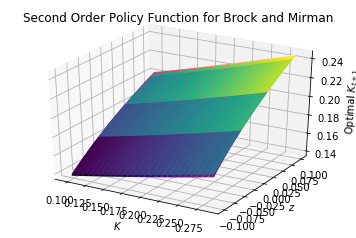

In [21]:
# Plot optimal capital stock rule as a function of firm size
kmat, zmat = np.meshgrid(kgrid,zgrid)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(kmat, zmat, opt_K, rstride=8,
                cstride=1, cmap='viridis')
ax.plot_surface(kmat, zmat, opt_K_actual, rstride=8,
                cstride=1, cmap='magma')
ax.set_title('Second Order Policy Function for Brock and Mirman')
ax.set_xlabel(r'$K$')
ax.set_ylabel(r'$z$')
ax.set_zlabel(r'Optimal $K_{t+1}$')
plt.savefig('Brock_and_Merman_second_order_policy')
plt.show()